<h1> Tarea 5 / Desarrollo Experimental 2

<h1> Fidel Alejandro Navarro Salazar

<h3>

Este trabajo tiene coomo objetivo generar distribuciones uniformes y gausianas de númneros aleatorios. 

También se implementar;a un código de simulación de Dinámica Browniana para el cálculo de las propiedades estructurales y diánmicas de sistemas con modelos de potencial de interacción continuos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython.display import Image
import random as rd
from numba import njit
#la función se encuentra en un documento por separado, 
#permite calcular la configuración inicial y la longitud de la caja
#la energía de la configuración inicial para 2D y 3D,
#y el calculo de las configuraciones en 2D y 3D
from config_T5_3 import caja, L_bi, gdr, wdt, gauss, fuerzaYukawa, fuerzaGauss, movimientoYukawa, pote

<h3>

Generaremos 10,000 números aleatorios e ilustraremos su distribución para 

a) Distribución uniforme

b) Distribución Gaussiana

In [2]:
dis_uni = []
dis_gauss = []
#Para distribución gaussiana si utilizará una media de mu=0.5 y una desviación estandar de sigma=0.001
mu = 0.
sigma = 1./4.

for i in range(10000):
    dis_uni.append(rd.uniform(-1,1))
    dis_gauss.append(gauss())

<h3>

Graficamos los resultados

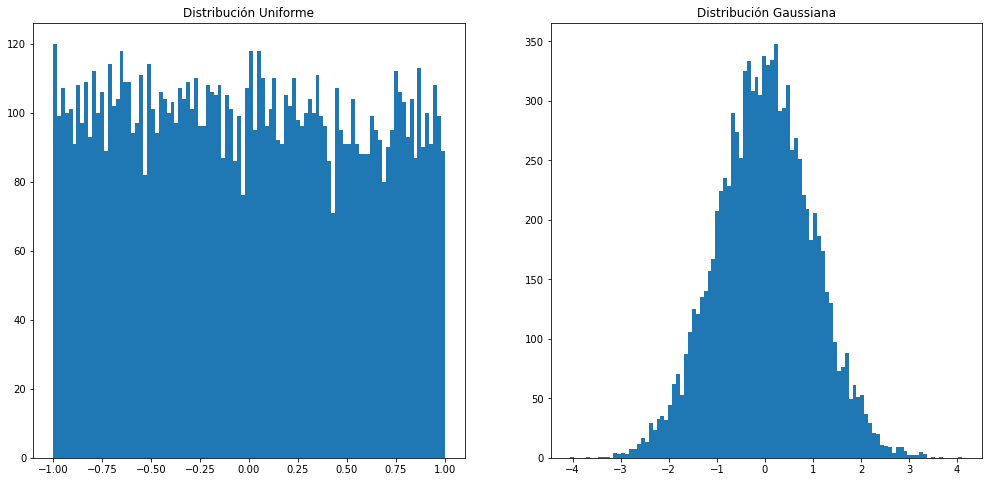

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(17,8)

ax1.hist(dis_uni, bins = 100)
ax1.set_title("Distribución Uniforme")

ax2.hist(dis_gauss, bins = 100)
ax2.set_title("Distribución Gaussiana")

plt.show()

<h3>

Se elaborará un código de simulación de Dinámica Browniana para

a) Potencial par de Yukawa

b) Potencial Gaussiano

<h1> Potencial Par de Yukawa

<h3> 
    
Para la simulación se consideró una fracción de volumen de $4.4*10^{-4}$

El potencial a utilizar será el Potencial DLVO (Yukawa)

$\beta u(r) = Ke^{-\kappa r}/r$

Donde $K=556e^{\kappa}$ y $\kappa = 0.149$

El algoritmo de Ermack para la posición es:
    
$x_i(t) = x_{i0} + F_i dT + \sqrt{2 dT} \alpha   $
    
Donde $\alpha$ es un número aleatorio con distribución gaussiana.
    
Para el cálculo de fuerzas tenemos que

$F_{x} = -\frac{x-x_0}{r} \frac{u(r)}{dr}$
    
Donde
    
$\frac{du(r)}{dr} = -556e^{\kappa} \frac{e^{-\kappa r}}{r^2} (\kappa r +1)$
    
De aquí
    
$F_{x} = (x-x_{0})(\kappa r +1)556e^{\kappa} \frac{e^{-\kappa r}}{r^3}$
    
$F_x = (x-x_{0})(\kappa r +1) \frac{\beta u(r)}{r^2}$

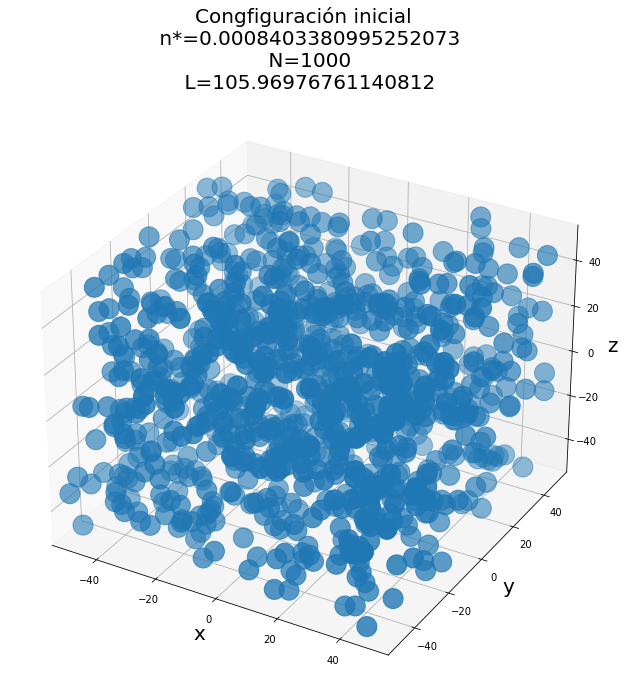

La energía por partícula de la configuración incial es  155.6345000687598


In [4]:
#Establecemos los valores con los cuales trabajaremos

N = 1000             #Número de partículas
n = 6*4.4e-4 / np.pi #Densidad
dim = 3              #La dimension con la cual trabajaremos (muchas funciones estan generalizadas)
nStep =20000         #Número de configuraciones
L = L_bi(n,N,dim)    #LLamamos a la función que nos calculará la longitud de la celda
rCut = L/2.          #Radio de corte 
#--------------------------------------------------------------------------------------------
seed = 652           #Semilla a utilizar en el cálculo de valores aleatorios
rd.seed(seed)        #Le damos la semilla al generador de números aleatorios
iFrec1 = 1          #Frecuencia con la que se guardarán los datos
iFrec2 = 1
nener = int(nStep/2)         #Iteración donde se alcanza el equilibrio termodinámico
dT = 0.0004          #Tiempo de paso
#--------------------------------------------------------------------------------------------
#Configuración inicial

v = caja(seed,n,N,dim)    #arrays de valores
x = v[:,0].copy()
y = v[:,1].copy()
z = v[:,2].copy()
inicial = pd.DataFrame(v , columns={"x","y","z"})   #dataFrame de los mismos

fig = plt.figure()
fig.set_size_inches(11,11)
L = L_bi(n,N,dim)

ax = fig.add_subplot(projection="3d")
ax.scatter(v[:,0],v[:,1],v[:,2], "o", s=400)
ax.set_title("Congfiguración inicial \n n*=" + str(n) + "\n N=" + str(N) + "\n L=" + str(L) , size=20)

ax.set_ylabel("y", size=20)
ax.set_xlabel("x", size=20)
ax.set_zlabel("z", size=20)

ax.set_xlim(-L/2,L/2)
ax.set_ylim(-L/2,L/2)
ax.set_zlim(-L/2,L/2)

plt.show()

#--------------------------------------------------------------------------------------------
#Calculamos la energía de la configuración inicial
E, fx, fy, fz = fuerzaYukawa(x, y, z, N, L, rCut)
print("La energía por partícula de la configuración incial es ", E/N)

In [5]:
xfin,yfin,zfin,Cx,Cy,Cz,Cxr,Cyr,Czr,V,k1,k2 = movimientoYukawa(x,y,z,fx,fy,fz,L,N,rCut,nStep,dT,nener,iFrec1, iFrec2)

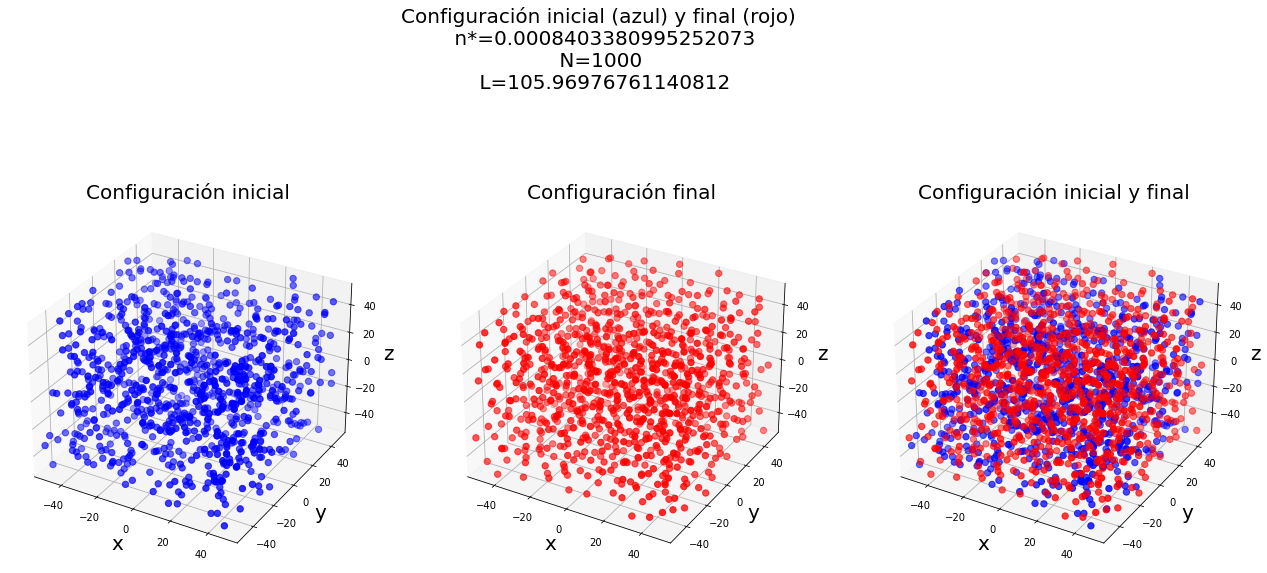

In [6]:
fig = plt.figure()
fig.set_size_inches(22,11)
fig.suptitle("Configuración inicial (azul) y final (rojo) \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)

ax1 = fig.add_subplot(1,3,1, projection="3d")
ax1.scatter(inicial["x"],inicial["y"],inicial["z"],"o", s=40,c="blue")

ax1.set_title("Configuración inicial", size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_zlabel("z", size=20)
ax1.set_xlim(-L/2.,L/2.)
ax1.set_ylim(-L/2.,L/2.)  
ax1.set_zlim(-L/2.,L/2.)

ax2 = fig.add_subplot(1,3,2, projection="3d")
ax2.scatter(xfin,yfin,zfin,"o", c="r", s=40)

ax2.set_title("Configuración final", size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_zlabel("z", size=20)
ax2.set_xlim(-L/2.,L/2.)
ax2.set_ylim(-L/2.,L/2.)  
ax2.set_zlim(-L/2.,L/2.)

ax3 = fig.add_subplot(1,3,3, projection="3d")
ax3.scatter(inicial["x"],inicial["y"],inicial["z"],"o", s=40,c="blue")
ax3.scatter(xfin,yfin,zfin,"o", c="r", s=40)

ax3.set_title("Configuración inicial y final", size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_zlabel("z", size=20)
ax3.set_xlim(-L/2.,L/2.)
ax3.set_ylim(-L/2.,L/2.)  
ax3.set_zlim(-L/2.,L/2.)

fig.savefig('configuraciones_yukawa', dpi=fig.dpi, facecolor="white")

plt.show()

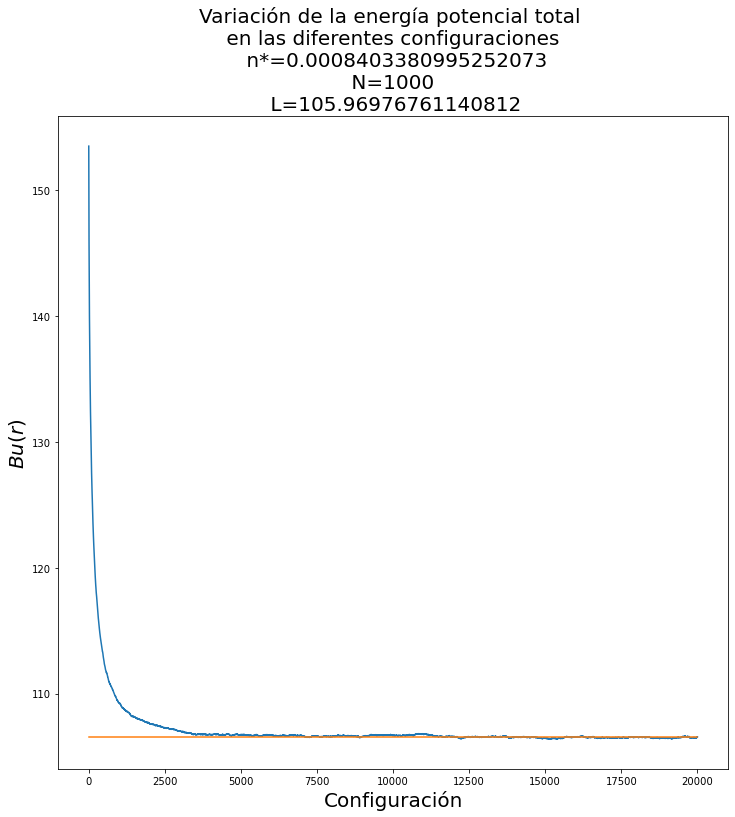

In [7]:
PromV = V[nener:].mean()
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(np.linspace(0, nStep, nStep), V/N)
    
ax.set_title("Variación de la energía potencial total \n en las diferentes configuraciones \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)
ax.set_ylabel("$B u(r)$", size=20)
ax.set_xlabel("Configuración", size=20)
ax.plot([0,nStep], [PromV/N, PromV/N])
#ax.set_xlim(nener, nStep)  
#ax.set_ylim(106,107)


fig.savefig('T5_Confi_Energia_Yukawa', dpi=fig.dpi, facecolor="white")

plt.show()

In [8]:
print("El promedio de la energía potencial es ", PromV/N)

El promedio de la energía potencial es  106.55183144822131


In [9]:
rt, gdr = gdr(Cx, Cy, Cz, rCut, L, nStep, n, N, k1)

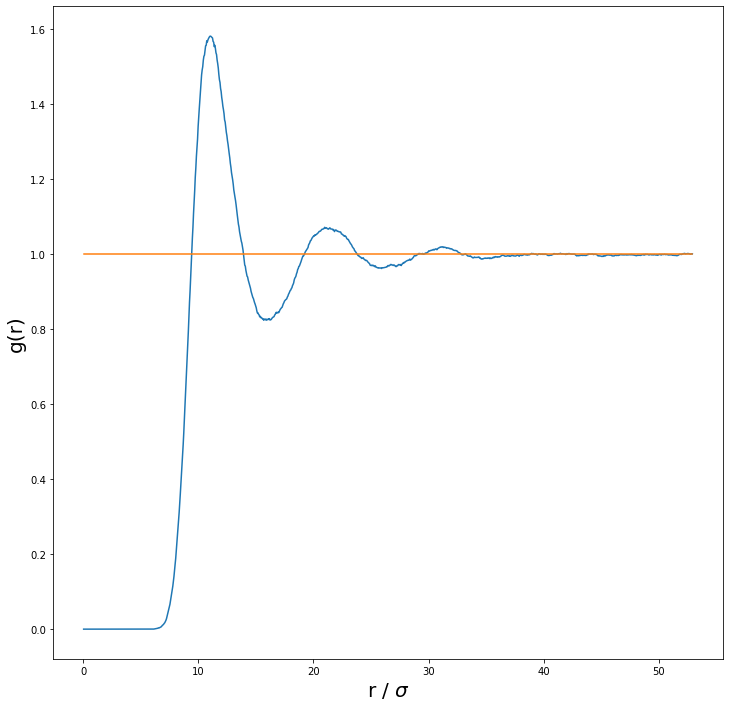

In [10]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(rt, gdr)
ax.plot([rt.min(), rt.max()],[1,1])

ax.set_ylabel("g(r)", size=20)
ax.set_xlabel("r / $\sigma$", size=20)
#ax.set_xlim(0, 2) 
#ax.set_ylim(0.97, 1.04)

fig.savefig('T5_GDR_Yukawa', dpi=fig.dpi, facecolor="white")

plt.show()

In [11]:
pote(rt, gdr, n)

ICONTACTO =  1058 , GDR DE CONTACTO =  1.0003558373936101
rho =  0.0008403380995252073 , Phs =  0.002600964373337961


In [12]:
time, wt, dif = wdt(Cxr, Cyr, Czr, N, k2, dT, iFrec2)

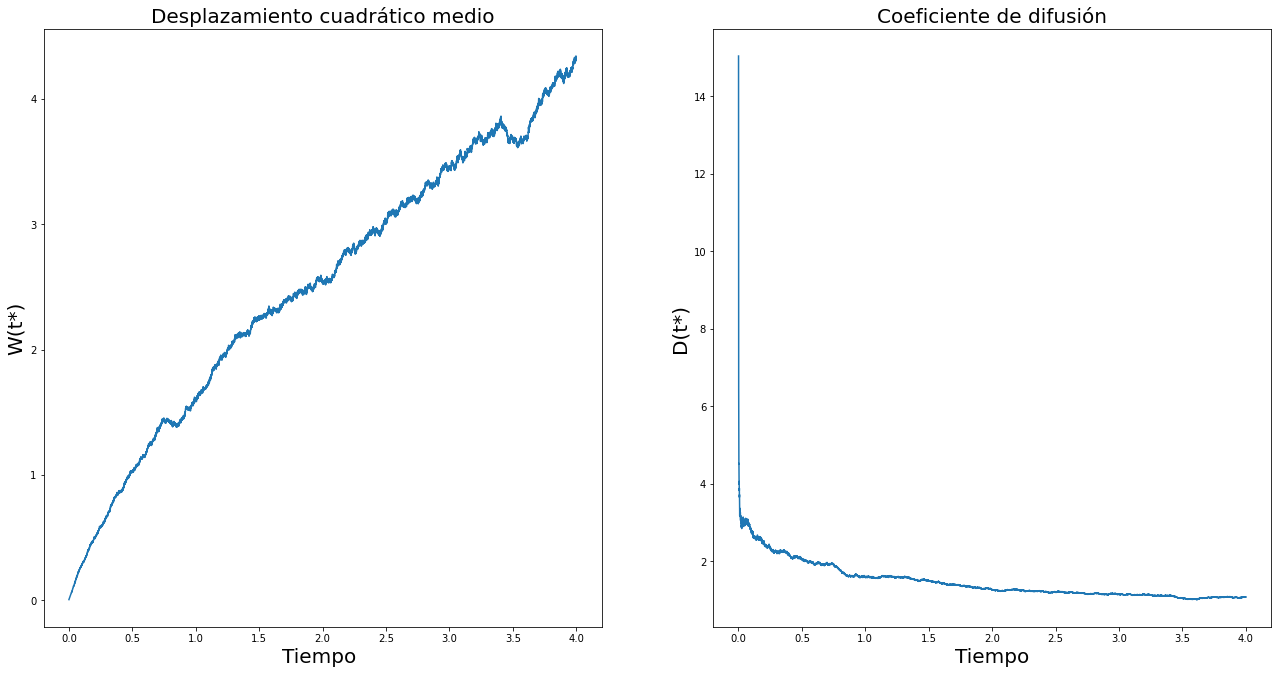

In [13]:
fig = plt.figure()
fig.set_size_inches(22,11)

ax1 = fig.add_subplot(1,2,1)
ax1.plot(time[1:],wt[1:])

ax1.set_title("Desplazamiento cuadrático medio", size=20)
ax1.set_ylabel("W(t*)", size=20)
ax1.set_xlabel("Tiempo ", size=20)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(time[1:], dif[1:])

ax2.set_title("Coeficiente de difusión", size=20)
ax2.set_ylabel("D(t*)", size=20)
ax2.set_xlabel("Tiempo", size=20)

fig.savefig('Wt_Dif_Yukawa', dpi=fig.dpi, facecolor="white")

plt.show()

In [14]:
np.savetxt('cx_yukawa.csv', Cx, delimiter=',')
np.savetxt('cy_yukawa.csv', Cy, delimiter=',')
np.savetxt('cz_yukawa.csv', Cz, delimiter=',')

np.savetxt('cxr_yukawa.csv', Cxr, delimiter=',')
np.savetxt('cyr_yukawa.csv', Cyr, delimiter=',')
np.savetxt('czr_yukawa.csv', Czr, delimiter=',')

np.savetxt('Energía_yukawa.csv', V, delimiter=',')

np.savetxt('rt_yukawa.csv', rt, delimiter=',')
np.savetxt('gdr_yukawa.csv', gdr, delimiter=',')

np.savetxt('time_yukawa.csv', time, delimiter=',')
np.savetxt('wt_yukawa.csv', wt, delimiter=',')
np.savetxt('dif_yukawa.csv', dif, delimiter=',')

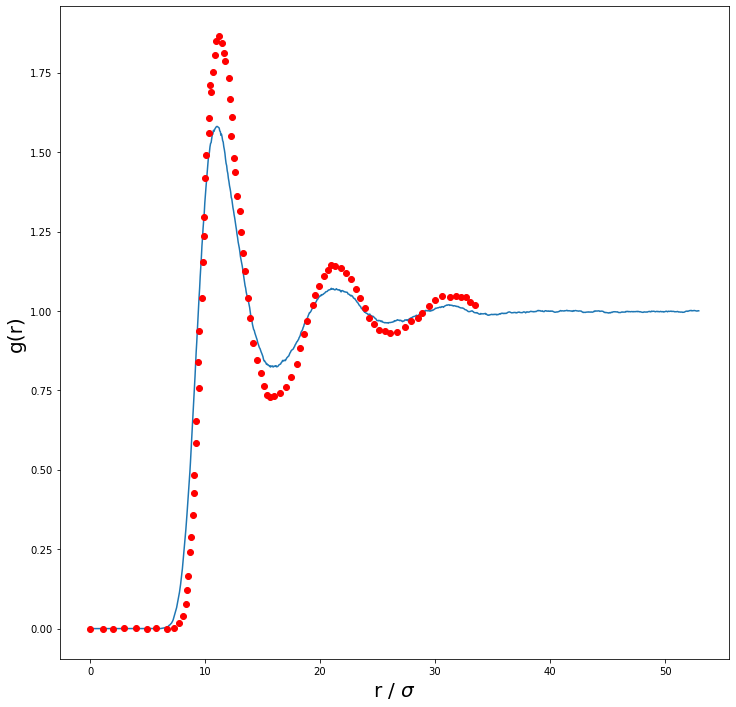

In [15]:
df = pd.read_csv("digit.csv", header=None)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(rt, gdr)
ax.plot(df[0], df[1], "o",color = "red")
#ax.plot(np.linspace([0,nStep], [vTraza.mean(), vTraza.mean()])

#ax.set_title("Variación de la energía potencial total \n en las diferentes configuraciones \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)
ax.set_ylabel("g(r)", size=20)
ax.set_xlabel("r / $\sigma$", size=20)
#ax.set_ylim(1.5, 1.9) 
#ax.set_xlim(9, 13) 
#fig.savefig('T4_GDR_comparación_1000_Gaylor', dpi=fig.dpi, facecolor="white")

plt.show()

<h1> Potencial Gaussiano

<h3> 
    
Para la simulación se consideró una fracción de volumen de $0.2$

El potencial a utilizar será el Potencial Gaussiano

$u(r) = \epsilon e^{-\kappa (\frac{r}{\sigma})^{2}} $
    
Donde $\epsilon = 100$ y $\sigma = ( \frac{6 \eta}{\pi \rho} )^{1/3}$

sea $\eta$ la fracción de volumen con valor de 0.2 

El algoritmo de Ermack para la posición es:
    
$x_i(t) = x_{i0} + F_i dT + \sqrt{2 dT} \alpha   $
    
Donde $\alpha$ es un número aleatorio con distribución gaussiana.
    
Para el cálculo de fuerzas tenemos que

$F_{x} = -\frac{x-x_0}{r} \frac{u(r)}{dr}$
    
Donde
    
$\frac{du(r)}{dr} = \frac{-2 \epsilon \kappa r}{\sigma ^2} e^{-\kappa (\frac{r}{\sigma})^{2}} = -\frac{2 \kappa r}{\sigma ^2}u(r) $
    
De aquí
    
$F_{x} = (x-x_{0})\frac{2 \kappa }{\sigma ^2}u(r)$

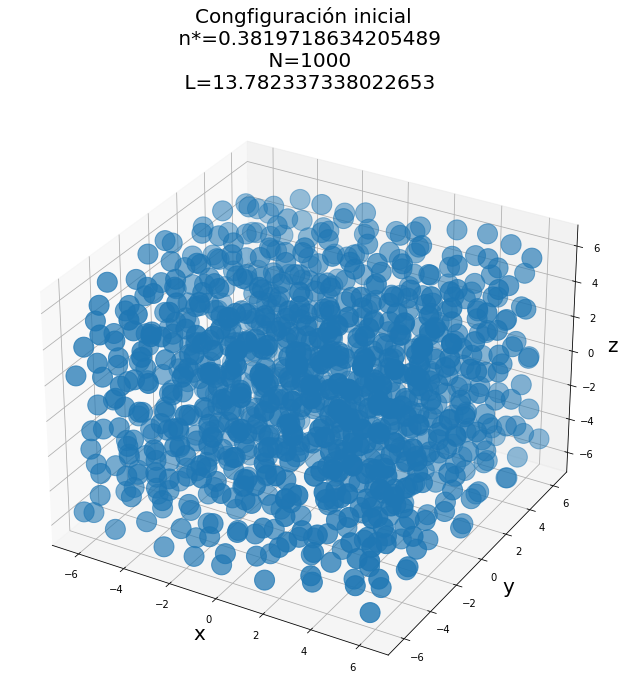

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython.display import Image
import random as rd
from numba import njit
#la función se encuentra en un documento por separado, 
#permite calcular la configuración inicial y la longitud de la caja
#la energía de la configuración inicial para 2D y 3D,
#y el calculo de las configuraciones en 2D y 3D
from config_T5_3 import caja, L_bi, gdr, wdt2, wdt,wdt3, gauss, fuerzaYukawa, fuerzaGauss, movimientoYukawa, movimientoGauss, pote
#--------------------------------------------------------------------------------------------

#Establecemos los valores con los cuales trabajaremos

N = 1000             #Número de partículas
n = 6*0.2 / np.pi             #Densidad
dim = 3              #La dimension con la cual trabajaremos (muchas funciones estan generalizadas)
nStep =20000         #Número de configuraciones
L = L_bi(n,N,dim)    #LLamamos a la función que nos calculará la longitud de la celda
rCut = L/2.          #Radio de corte 
#--------------------------------------------------------------------------------------------
seed = 652           #Semilla a utilizar en el cálculo de valores aleatorios
rd.seed(seed)        #Le damos la semilla al generador de números aleatorios
iFrec1 = 1          #Frecuencia con la que se guardarán los datos
iFrec2 = 1
nener = int(nStep/2)         #Iteración donde se alcanza el equilibrio termodinámico
dT = 0.0004          #Tiempo de paso
#--------------------------------------------------------------------------------------------
#Configuración inicial

v = caja(seed,n,N,dim)    #arrays de valores
x = v[:,0].copy()
y = v[:,1].copy()
z = v[:,2].copy()
inicial = pd.DataFrame(v , columns={"x","y","z"})   #dataFrame de los mismos

fig = plt.figure()
fig.set_size_inches(11,11)
L = L_bi(n,N,dim)

ax = fig.add_subplot(projection="3d")
ax.scatter(v[:,0],v[:,1],v[:,2], "o", s=400)
ax.set_title("Congfiguración inicial \n n*=" + str(n) + "\n N=" + str(N) + "\n L=" + str(L) , size=20)

ax.set_ylabel("y", size=20)
ax.set_xlabel("x", size=20)
ax.set_zlabel("z", size=20)

ax.set_xlim(-L/2,L/2)
ax.set_ylim(-L/2,L/2)
ax.set_zlim(-L/2,L/2)

plt.show()

#--------------------------------------------------------------------------------------------
#Calculamos la energía de la configuración inicial


In [17]:
E, fx, fy, fz = fuerzaGauss(x,y,z,N,L,rCut,n)
print("La energía por partícula de la configuración incial es ", E/N)

La energía por partícula de la configuración incial es  74.66834848088317


In [18]:
xfin,yfin,zfin,Cx,Cy,Cz,Cxr,Cyr,Czr,V,k1,k2 = movimientoGauss(x,y,z,fx,fy,fz,L,N,rCut,nStep,dT,nener,iFrec1, iFrec2, n)

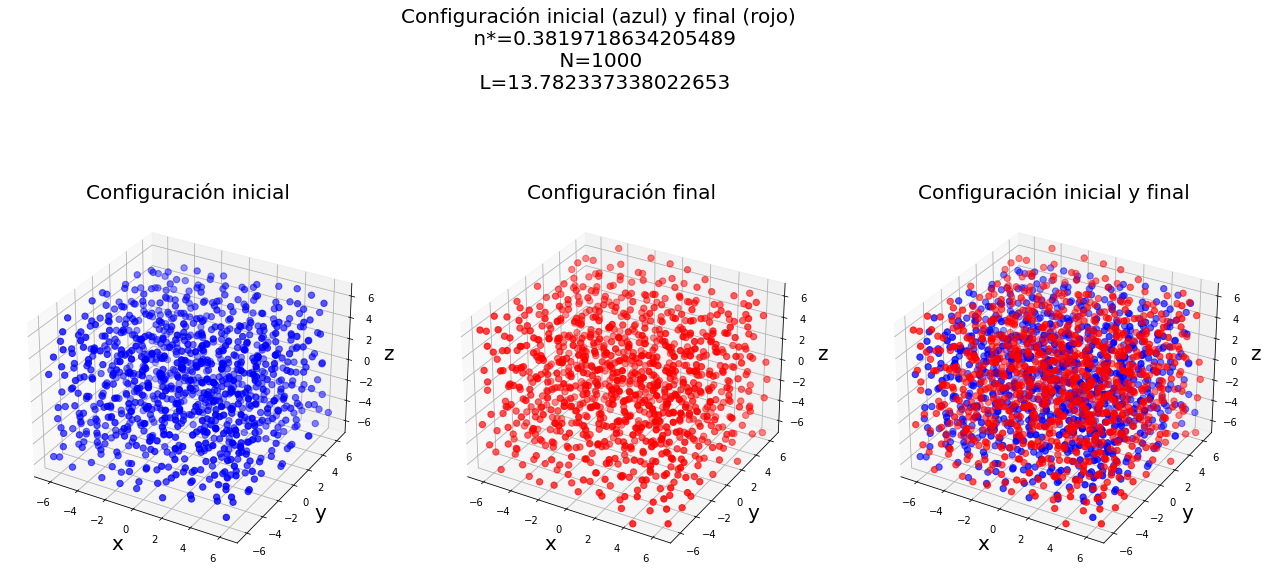

In [19]:
fig = plt.figure()
fig.set_size_inches(22,11)
fig.suptitle("Configuración inicial (azul) y final (rojo) \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)

ax1 = fig.add_subplot(1,3,1, projection="3d")
ax1.scatter(inicial["x"],inicial["y"],inicial["z"],"o", s=40,c="blue")

ax1.set_title("Configuración inicial", size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_zlabel("z", size=20)
ax1.set_xlim(-L/2.,L/2.)
ax1.set_ylim(-L/2.,L/2.)  
ax1.set_zlim(-L/2.,L/2.)

ax2 = fig.add_subplot(1,3,2, projection="3d")
ax2.scatter(xfin,yfin,zfin,"o", c="r", s=40)

ax2.set_title("Configuración final", size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_zlabel("z", size=20)
ax2.set_xlim(-L/2.,L/2.)
ax2.set_ylim(-L/2.,L/2.)  
ax2.set_zlim(-L/2.,L/2.)

ax3 = fig.add_subplot(1,3,3, projection="3d")
ax3.scatter(inicial["x"],inicial["y"],inicial["z"],"o", s=40,c="blue")
ax3.scatter(xfin,yfin,zfin,"o", c="r", s=40)

ax3.set_title("Configuración inicial y final", size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_zlabel("z", size=20)
ax3.set_xlim(-L/2.,L/2.)
ax3.set_ylim(-L/2.,L/2.)  
ax3.set_zlim(-L/2.,L/2.)

fig.savefig('configuraciones_gauss', dpi=fig.dpi, facecolor="white")

plt.show()

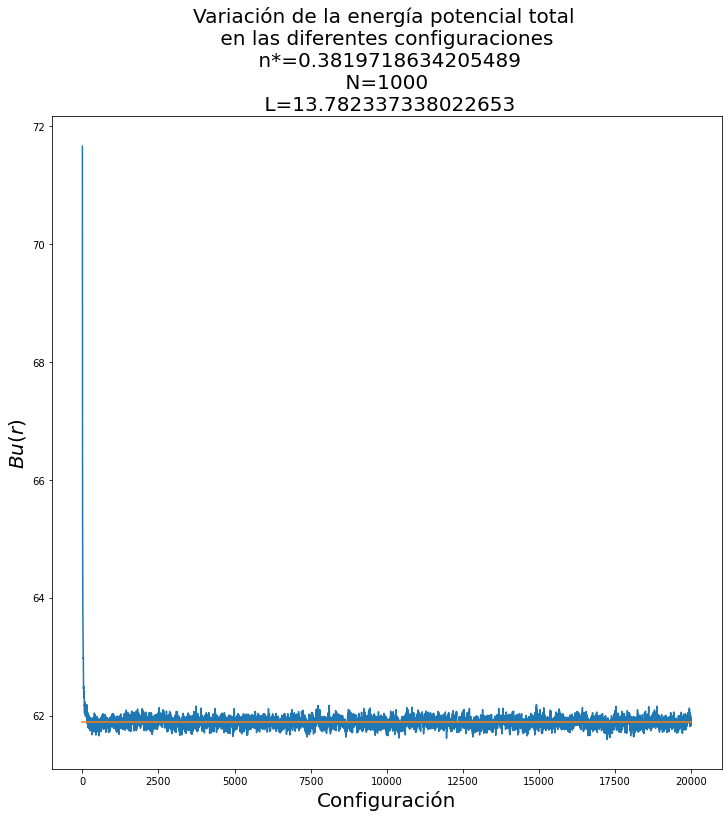

In [20]:
#V = pd.read_csv("Energía_gauss.csv", header=None)

PromV = V[nener:].mean()
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(np.linspace(0, nStep, nStep), V/N)
    
ax.set_title("Variación de la energía potencial total \n en las diferentes configuraciones \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)
ax.set_ylabel("$B u(r)$", size=20)
ax.set_xlabel("Configuración", size=20)
ax.plot([0,nStep], [PromV/N, PromV/N])
#ax.set_xlim(nener, nStep)  
#ax.set_ylim(106,107)


fig.savefig('T5_Confi_Energia_Gauss', dpi=fig.dpi, facecolor="white")

plt.show()

In [21]:
print("El promedio de la energía potencial es ", PromV/N)

El promedio de la energía potencial es  61.883096508461605


In [22]:
rt, gdr = gdr(Cx, Cy, Cz, rCut, L, nStep, n, N, k1)

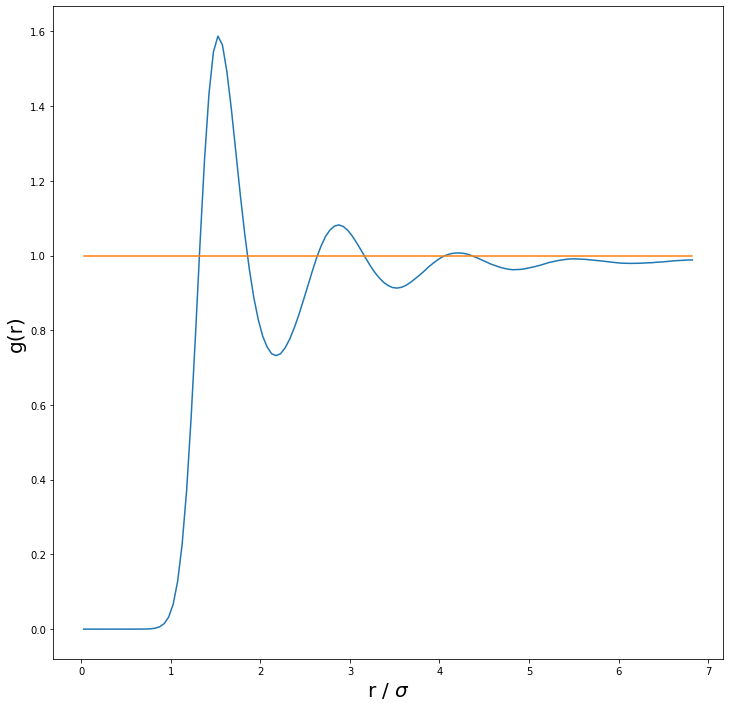

In [23]:
#rt = pd.read_csv("rt_gauss.csv", header=None)
#gdr = pd.read_csv("gdr_gauss.csv", header=None)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(rt, gdr)
ax.plot([rt.min(), rt.max()],[1,1])

ax.set_ylabel("g(r)", size=20)
ax.set_xlabel("r / $\sigma$", size=20)
#ax.set_xlim(0, 2) 
#ax.set_ylim(0.97, 1.04)

fig.savefig('T5_GDR_Gauss', dpi=fig.dpi, facecolor="white")

plt.show()

In [24]:
pote(rt, gdr, n)

ICONTACTO =  136 , GDR DE CONTACTO =  0.9882022425903978
rho =  0.3819718634205489 , Phs =  1.1725336574928673


In [25]:
time, wt, dif = wdt(Cxr, Cyr, Czr, N, k2, dT, iFrec2)

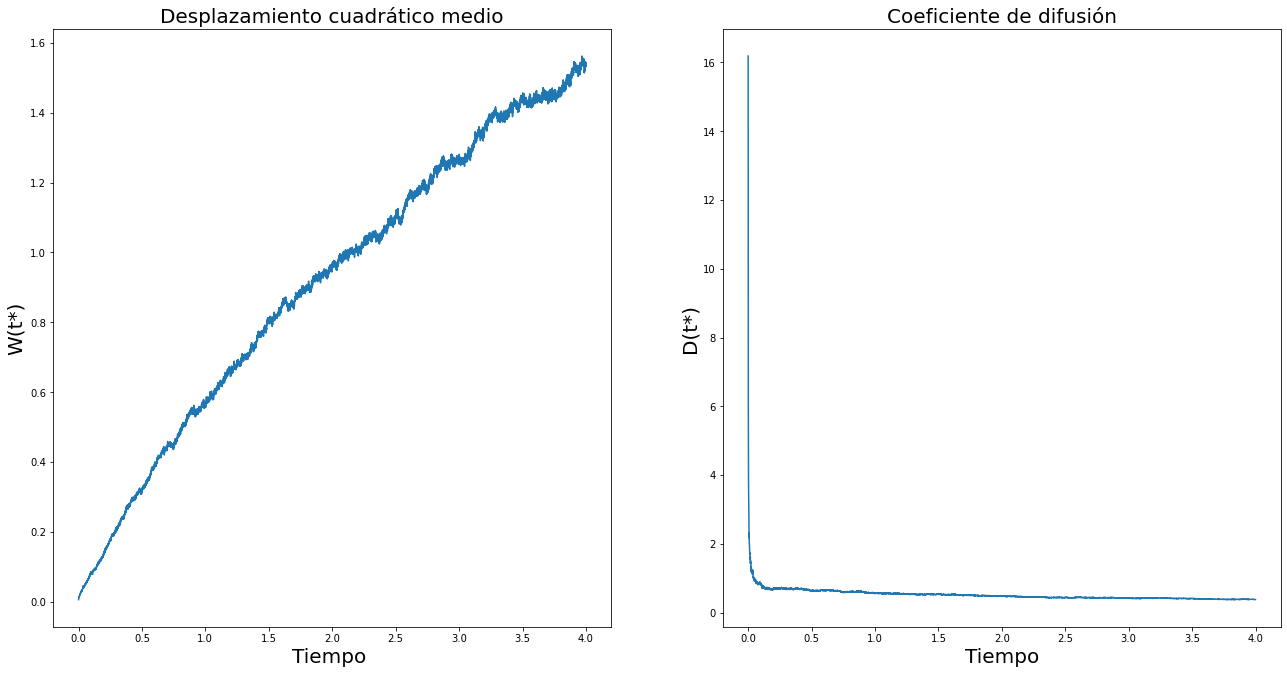

In [26]:
fig = plt.figure()
fig.set_size_inches(22,11)

ax1 = fig.add_subplot(1,2,1)
ax1.plot(time[1:],wt[1:])

ax1.set_title("Desplazamiento cuadrático medio", size=20)
ax1.set_ylabel("W(t*)", size=20)
ax1.set_xlabel("Tiempo ", size=20)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(time[1:], dif[1:])

ax2.set_title("Coeficiente de difusión", size=20)
ax2.set_ylabel("D(t*)", size=20)
ax2.set_xlabel("Tiempo", size=20)

fig.savefig('Wt_Dif_Gauss', dpi=fig.dpi, facecolor="white")

plt.show()

In [27]:
np.savetxt('cx_gauss.csv', Cx, delimiter=',')
np.savetxt('cy_gauss.csv', Cy, delimiter=',')
np.savetxt('cz_gauss.csv', Cz, delimiter=',')

np.savetxt('cxr_gauss.csv', Cxr, delimiter=',')
np.savetxt('cyr_gauss.csv', Cyr, delimiter=',')
np.savetxt('czr_gauss.csv', Czr, delimiter=',')

np.savetxt('Energía_gauss.csv', V, delimiter=',')

np.savetxt('rt_gauss.csv', rt, delimiter=',')
np.savetxt('gdr_gauss.csv', gdr, delimiter=',')

np.savetxt('time_gauss.csv', time, delimiter=',')
np.savetxt('wt_gauss.csv', wt, delimiter=',')
np.savetxt('dif_gauss.csv', dif, delimiter=',')

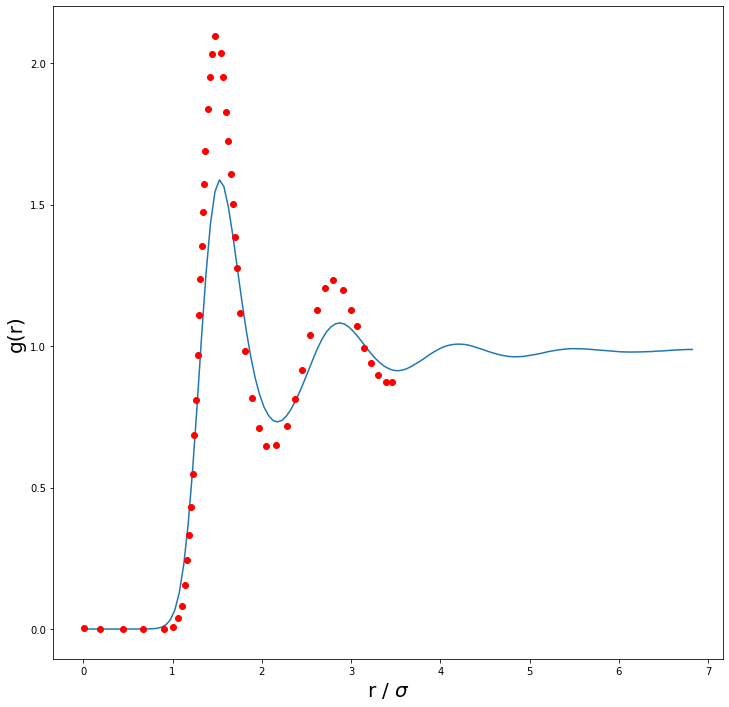

In [28]:
df = pd.read_csv("digitgauss.csv", header=None)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(rt, gdr)
ax.plot(df[0], df[1], "o",color = "red")
#ax.plot(np.linspace([0,nStep], [vTraza.mean(), vTraza.mean()])

#ax.set_title("Variación de la energía potencial total \n en las diferentes configuraciones \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)
ax.set_ylabel("g(r)", size=20)
ax.set_xlabel("r / $\sigma$", size=20)
#ax.set_ylim(1.5, 1.9) 
#ax.set_xlim(9, 13) 
#fig.savefig('T4_GDR_comparación_1000_Gaylor', dpi=fig.dpi, facecolor="white")

plt.show()